In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from smtools import sm_sort, tros_ms, lc_cmap

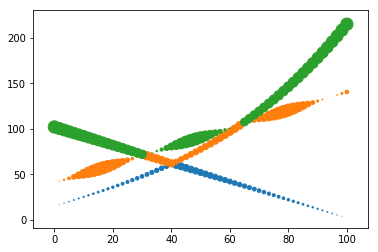

In [2]:
x = np.linspace(0, 100, 61)
y1 = x + 0.0001*x**3+15
i1 = x/100
y2 = x[::-1] + 2
i2 = 1 - x / 100
y3 = x + 40.5
i3 = np.sin(x/10)**2.0
dat = np.array([y1, y2, y3]).T
intensity = np.array([i1, i2, i3]).T
# Stark map eigenvalues are usually sorted, obscuring exact crossings. 
dat, intensity = tros_ms(dat, intensity)

fig, ax = plt.subplots()
for ix in range(3):
    ax.scatter(x, dat[:,ix], marker='.', s=600*intensity[:, ix]**2.0)
plt.show()

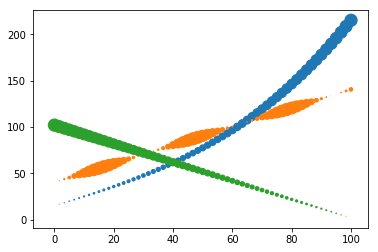

In [3]:
dat2, intensity2 = sm_sort(dat, intensity)

fig, ax = plt.subplots()
for ix in range(3):
    ax.scatter(x, dat2[:,ix], marker='.', s=600*intensity2[:, ix]**2.0)
plt.show()

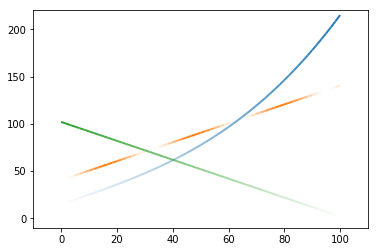

In [4]:
fig, ax = plt.subplots()
for ix in range(3):
    #cs = np.asarray([to_rgba(col['color'], a) for a in zs]) #RGBalpha
    alpha = np.clip(intensity2[:, ix], 0, 1)
    cs = np.asarray([to_rgba('C%d'%ix, a) for a in alpha]) #RGBalpha
    lc = lc_cmap(x, dat2[:,ix], cs)
    lc.set_linewidth(2)
    ax.add_collection(lc)
ax.set_xlim(-10, 110)
ax.set_ylim(-10, 220)

plt.show()